# Task 2: Quarks and Gluons


First import the data set that you will find in the repository as QG_jets.npz



In [69]:
import numpy as np


In [1]:
pip install kaggle


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105854 sha256=3cbdc4ec5b7baed1246893285869b0da5bd8d07ffd427b44577fd91ed1318748
  Stored in directory: c:\users\rohan\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [ ]:
kaggle datasets download -d username/dataset-name

In [70]:


data= np.load(file_path)
X=data['X']
y=data['y']




## Plot the data

first will plot rapidity vs pt, red if Quarks ,Blue if gluon jet

pt: Transverse momentum of the particle.<br>
Rapidity: A measure related to the angle and velocity of the particle.<br>
Azimuthal angle (ϕ): The angle of the particle in the transverse plane.<br>
PDG ID: Identifies the type of particle.<br>


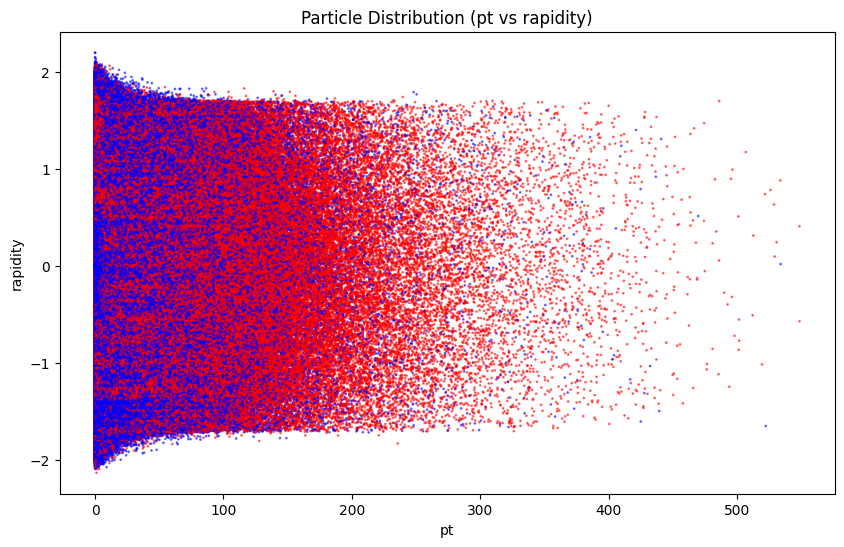

In [38]:
import matplotlib.pyplot as plt
pt = X[:, :, 0].flatten()  # Particle pt
rapidity = X[:, :, 1].flatten()  # Particle rapidity

# Use the corresponding labels (y) to color the points

colors=[]
for label in y:
    for n in range(139):
        colors.append('blue' if label==0 else 'red')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(pt, rapidity, alpha=0.5, s=1,c=colors)
plt.title("Particle Distribution (pt vs rapidity)")
plt.xlabel("pt")
plt.ylabel("rapidity")
plt.show()



<br><br>Conclusion: the relation between pt and rapidity is not well defined.
<br>

## Now plotting the graph between pt(x-axis) vs azimuthal angle.
<br>



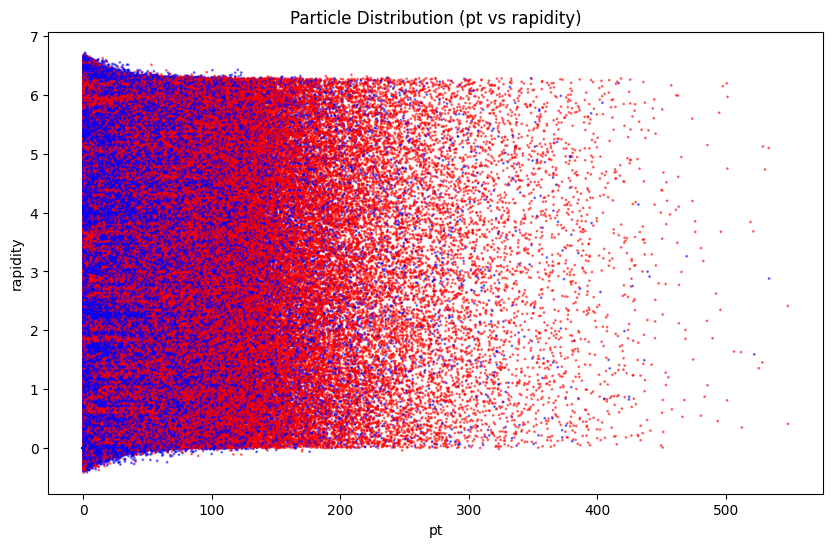

In [39]:
pt = X[:, :, 0].flatten()  # Particle pt
rapidity = X[:, :, 2].flatten() 
plt.figure(figsize=(10, 6))
plt.scatter(pt, rapidity, alpha=0.5, s=1,c=colors)
plt.title("Particle Distribution (pt vs rapidity)")
plt.xlabel("pt")
plt.ylabel("rapidity")
plt.show()

Conclusion is same the relation is not well defined <br>

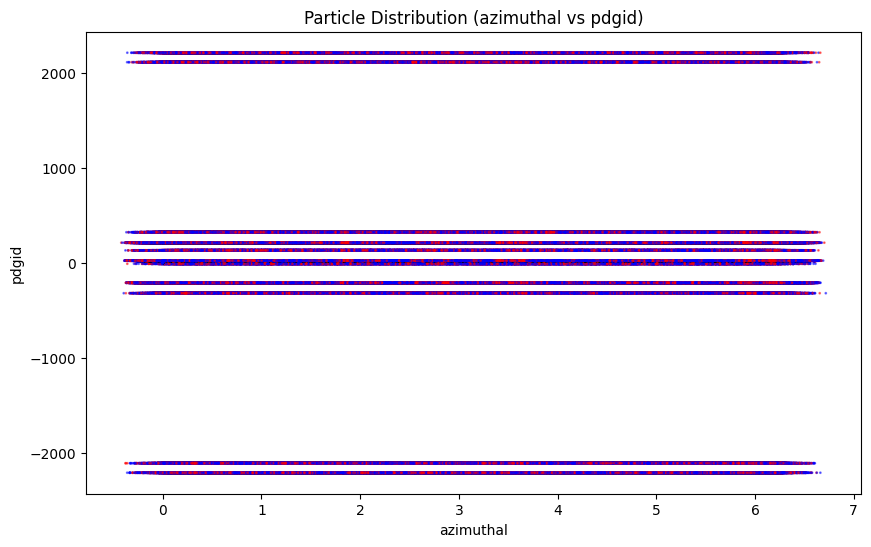

In [51]:
colors=[]
for label in y:
    for n in range(139):
        colors.append('blue' if label==0 else 'red')

azimuthal = X[:, :, 2].flatten()  # Particle pt
pdgid = X[:, :, 3].flatten() 
plt.figure(figsize=(10, 6))
plt.scatter(azimuthal, pdgid, alpha=0.5, s=1,c=colors)
plt.title("Particle Distribution (azimuthal vs pdgid)")
plt.xlabel("azimuthal")
plt.ylabel("pdgid")
plt.show()

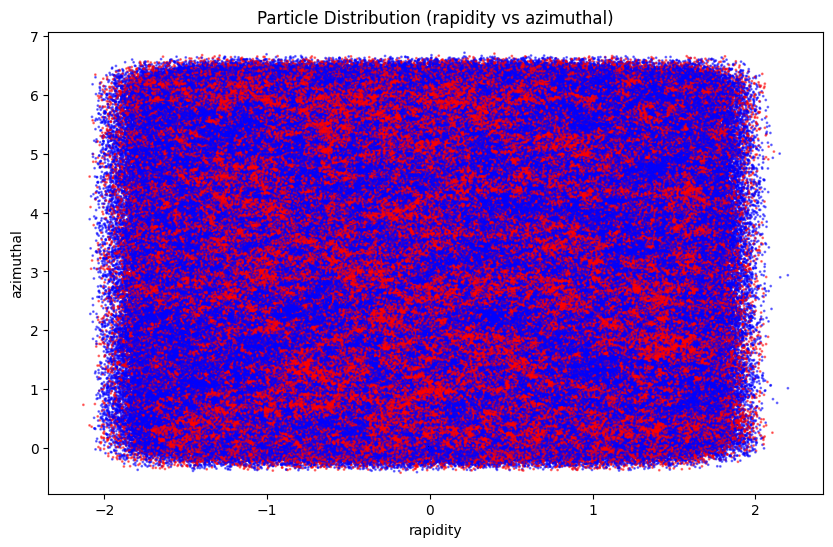

In [57]:
colors=[]
for label in y:
    for n in range(139):
        colors.append('blue' if label==0 else 'red')

rapidity = X[:, :, 1].flatten()  # Particle pt
azimuthal = X[:, :, 2].flatten() 
plt.figure(figsize=(10, 6))
plt.scatter(rapidity, azimuthal, alpha=0.5, s=1,c=colors)
plt.title("Particle Distribution (rapidity vs azimuthal)")
plt.xlabel("rapidity")
plt.ylabel("azimuthal")
plt.show()

In [63]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.1 MB 3.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 3.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.6 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 1.5 MB/s eta 0:00:05
   ----------

## CREATING THE MODELS USING SCI-KIT LEARN LogisticRegression

Model1-> pt vs y(0 or 1 depending if jet is gluon or quark)
Model2->Rapidity vs y
Model3-> azimuthal vs y

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_selected1 = X[:, :, 0]  
X_selected2 = X[:, :, 1]
X_selected3 = X[:, :, 2]
#  Flatten or summarize the 139 time steps per sample
#  take the mean of the 139 time steps:
X_final1 = X_selected1.mean(axis=1)  # Shape becomes (100000,)
X_final2 = X_selected2.mean(axis=1)
X_final3 = X_selected3.mean(axis=1)
# Splitting the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final1.reshape(-1, 1), y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final2.reshape(-1, 1), y, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_final3.reshape(-1, 1), y, test_size=0.2, random_state=42)
# Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

# Making predictions
y_pred1 = model1.predict(X_test1)

# Accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

# Making predictions
y_pred2 = model2.predict(X_test2)

# Accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)


model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

# Making predictions
y_pred3 = model3.predict(X_test3)

# Accuracy
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)


Accuracy: 0.50625
Accuracy: 0.43235
Accuracy: 0.63675


## Model 3 has the best accuracy so will keep  model 3 in hand <br>
## Now will try giving two features at a time 


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


X_selected = X[:, :, [0,1]]  # Select features at index 0 and 1 along the last axis, shape (100000, 139, 2)

# Flatten or summarize the 139 time steps per sample (e.g., by taking the mean across the time steps)
X_final = X_selected.mean(axis=1)  # Shape becomes (100000, 2)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.50455


I have tried all combination no model gives me the desired results so model3 above was the best